<a href="https://colab.research.google.com/github/KoshiBG/Python_for_data_analysis/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [1]:
!pip install mysql-connector-python
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 62.2 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [5]:
# SQL-запит для вибірки hire_date
query = "SELECT hire_date FROM employees"

# Використання pandas.read_sql для завантаження результатів запиту у DataFrame
df = pd.read_sql(query, con)

# Перетворюємо колонку hire_date на формат datetime, щоб можна було працювати з роками
df['hire_date'] = pd.to_datetime(df['hire_date'])

# Додаємо нову колонку з роком найму
df['hire_year'] = df['hire_date'].dt.year

# Групуємо за роком найму і рахуємо кількість співробітників за кожним роком
df_hire_counts = df.groupby('hire_year').size().reset_index(name='emp_num');

# Виводимо результат
display(df_hire_counts)


<ipython-input-5-2de2fb00ca30>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con)


,hire_year,emp_num
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [6]:
import matplotlib.pyplot as plt

<ipython-input-10-194a97e96ff4>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con)


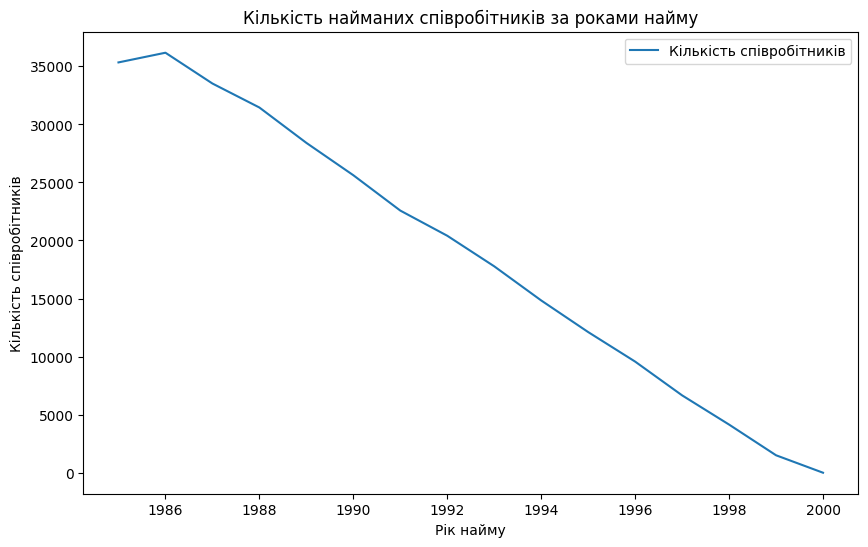

In [10]:
# SQL-запит для вибірки hire_date з перейменуванням колонки
query = """
SELECT YEAR(hire_date) AS hire_year
FROM employees
"""

# Використання pandas.read_sql для завантаження результатів запиту у DataFrame
df = pd.read_sql(query, con)
# Групуємо за роком найму і рахуємо кількість співробітників за кожним роком
df_hire_counts = df.groupby('hire_year').size().reset_index(name='employee_count')

# Сортуємо дані за роком найму
df_hire_counts = df_hire_counts.sort_values(by='hire_year')

# Побудова лінійного графіка
plt.figure(figsize=(10,6))
plt.plot(df_hire_counts['hire_year'], df_hire_counts['employee_count'],label='Кількість співробітників')

# Додаємо підписи до осей і заголовок
plt.title('Кількість найманих співробітників за роками найму')
plt.xlabel('Рік найму')
plt.ylabel('Кількість співробітників')
plt.legend()

# Відображення графіка
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [17]:
# SQL-запит для вибірки кількості років перебування на позиції 'Engineer', якщо to_date не дорівнює 9999-01-01
query = """
SELECT emp_no,
       title,
       TIMESTAMPDIFF(YEAR, from_date, to_date) AS years_in_position
FROM titles
WHERE title = 'Engineer' AND to_date != '9999-01-01'
"""

# Використання pandas.read_sql для завантаження результатів запиту у DataFrame
df_years = pd.read_sql(query, con)
df_years


<ipython-input-17-65b6b06756da>:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(query, con)


,emp_no,title,years_in_position
0,10004,Engineer,9
1,10009,Engineer,5
2,10012,Engineer,8
3,10018,Engineer,8
4,10026,Engineer,5
...,...,...,...
84015,499972,Engineer,9
84016,499984,Engineer,5
84017,499994,Engineer,0
84018,499996,Engineer,6


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

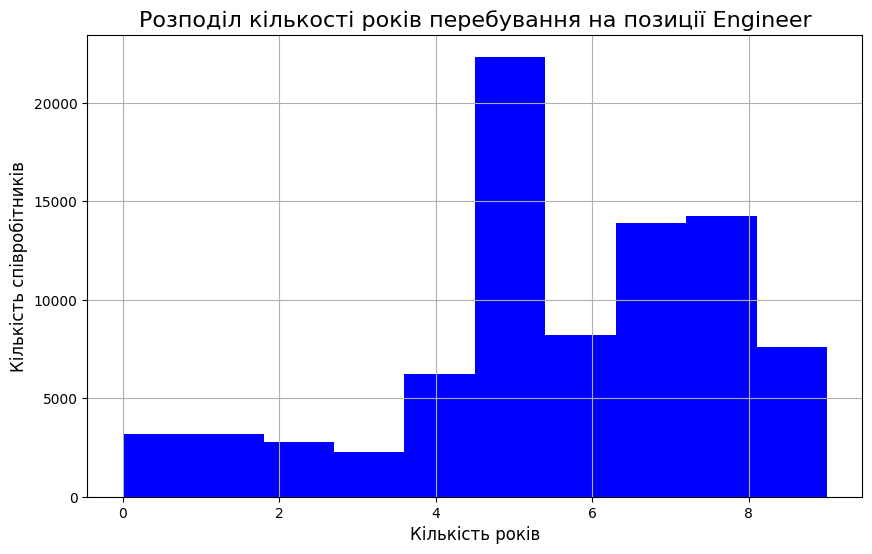

In [21]:
# Побудова гістограми кількості років перебування на позиції 'Engineer'
plt.figure(figsize=(10, 6))
plt.hist(df_years['years_in_position'], bins=10, color='blue',)

# Назва графіка та підпис осей
plt.title('Розподіл кількості років перебування на позиції Engineer', fontsize=16)
plt.xlabel('Кількість років', fontsize=12)
plt.ylabel('Кількість співробітників', fontsize=12)

# Показати графік
plt.grid(True)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [22]:
con.close()